# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Propósito del proyecto y como abordar

Tenemos la empresa de telecomunicaciones Megaline, el cual ofrece ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. Debemos determinar qué plan en promedio, aporta más ingresos, para ello antes de comenzar a realizar alguna análisis, realizaré una visualización previa de cada una de los dataframes, evaluar si existen valores nulos, duplicados, y si es necesario cambiar algún tipo de dato, de algún campo de nuestro dataframe. A medida que se vaya realizando dicha limpieza, ir haciendo la unión respectiva de los dataframes necesarios para poder llevar acabo el analisis respectivo, de esta menera poder recopilar toda la información para que nuestro dataframe final contenga toda la información de consumo de nuestros usuarios, y poder contar con los ingresos mensuales que genera cada uno de los usuarios, de esta manera ir estudiando el compartamiento de los mismos. Se quiere evaluar el compartamiento de los usuarios tanto para el consumo que realizan en mensajes enviados, duración de llamadas, y gigabytes consumidos mensualmente. Realizar gráficos de barras, de distribución y de caja para nuestro estudio, esto con el fin de visualizar de manera clara y más atractiva la información generada de dichos comportamientos, y finalmente poder concluir con la comprobación de hipótesis.

## Inicialización <a id='inicio'></a>

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt 
from scipy import stats
from matplotlib.ticker import MultipleLocator
from scipy.stats import ttest_ind

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-5/megaline_calls.csv')
internet = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-5/megaline_internet.csv')
messages = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-5/megaline_messages.csv')
plans = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-5/megaline_plans.csv')
users = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-5/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Comentarios:** Observamos que existen solos 2 planes, y nos muestra lo que incluye cada plan, tanto en  cantidad de mensajes incluidos, megabytes incluidos, minutos incluidos, costo del plan, precio por gigabytes, precio por mensaje,  precio por minuto y nombre del plan. Podemos observar de forma preliminar que vamos a necesitar en consumo por gigabytes de nuestros clientes, ya que tenemos precio por gigabytes y no en megabytes, y vamos a requerirlo para calcular el ingreso que genera cada uno de nuestros clientes mensualmente en su plan.

### Corregir Datos

**Comentario:** En este caso solo contamos 2 filas para esta tabla, los tipos de datos se encuentra bien como estan, no es necesario realizar algún cambio de momento para esta dataframe.

### Enriquecer Datos

**Comentario:** En este caso solo contamos 2 filas para esta tabla, los tipos de datos se encuentra bien como estan, no es necesario realizar algún cambio de momento para esta dataframe.

## Usuarios/as

In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de datos para usuarios

users.head(n=20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


**Comentario:** En este caso los valores nulos, representa aquellos usuarios con servicio activo (no han abandonando el servicio), son usuarios activos. Sin embargo haremos ajuste a estos valores nulos más adelante, para nuestra tabla final, ya que tenemos que realizar uniones primeramente entre algunas tablas.

### Corregir los datos

In [7]:
#Verificando si hay duplicados

users.duplicated(keep=False).sum()

np.int64(0)

In [8]:
#Verificando si hay valores nulos

users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

**Comentario:** En este caso los valores nulos, representa aquellos usuarios con servicio activo (no han abandonando el servicio), son usuarios activos. Sin embargo haremos ajuste a estos valores nulos más adelante, para nuestra tabla final, ya que tenemos que realizar uniones primeramente entre algunas tablas.

In [9]:
users_conv = users.copy()

# Convertimos campo 'reg_date' en datetime

users_conv['reg_date'] = pd.to_datetime(users_conv['reg_date'])

display(users_conv)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


### Enriquecer los datos

In [10]:
# Creamos columna nueva llamada plan_name

users_conv['plan_name'] = users_conv['plan']

# Eliminamos columna plan, ya que creamos una nueva llamada plan_name

users_conv=users_conv.drop('plan',axis=1)

**Comentario:** Realizamos cambio de nombre del campo plan, ya que el dataframe de plan(donde se encuentra las tarifas)
    este campo se llama plan, y para realizar a futuro alguna union entre dataframes deseamos que se llamen de la misma manera.

In [11]:
#Convertimos campo 'churn_date' en fecha, sin alterar los existentes

users_conv['churn_date']= pd.to_datetime(users_conv['churn_date'])


In [12]:
users_clean = users_conv
users_clean.head(n=10)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,NaT,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,NaT,surf
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,NaT,surf
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,2018-12-18,ultimate
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,NaT,surf
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,NaT,ultimate
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,NaT,surf


**Comentario:** En te caso se generaron valores NaT en churn_date esto puede generarse cuando se trabaja con pd.to_datetime. De igual manera estos valores NaT seran tratados en nuestra tabla final que contendra todo los campos necesarios para estudiar el compartamiento de los usuarios.

In [13]:
# Realizamos union de la dataframe users_clean con plans de tipo how='outer', ya que nos interesa toda la informacion 
# de ambos dataframes sin excluir ninguna informacion

users_plans = pd.merge(users_clean, plans, on='plan_name', how='outer')

users_plans.head(n=10)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,50,15360,500,20,10,0.03,0.03
1,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,surf,50,15360,500,20,10,0.03,0.03
2,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,NaT,surf,50,15360,500,20,10,0.03,0.03
3,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,NaT,surf,50,15360,500,20,10,0.03,0.03
4,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,NaT,surf,50,15360,500,20,10,0.03,0.03
5,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,NaT,surf,50,15360,500,20,10,0.03,0.03
6,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,NaT,surf,50,15360,500,20,10,0.03,0.03
7,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,NaT,surf,50,15360,500,20,10,0.03,0.03
8,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,2018-11-16,surf,50,15360,500,20,10,0.03,0.03
9,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,NaT,surf,50,15360,500,20,10,0.03,0.03


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

calls.head(n=20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


**Comentario:** Duración de llamadas seran redondeadas más adelante, en nuestra tabla final, ya que tratemos los valores nulos o NaT de nuestro dataframe definitivo.


### Corregir los datos

In [16]:
# Verificando si hay duplicados

calls.duplicated(keep=False).sum()

np.int64(0)

In [17]:
# Verificando si hay valores nulos

calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [18]:
# Convertimos campo 'call_date' en datetime

calls_clean = calls.copy()

calls_clean['call_date'] = pd.to_datetime(calls_clean['call_date'])

### Enriquecer los datos

In [19]:
# Verificando los cambios en el tipo de datos 

calls_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [20]:
# Realizar un merge de users y calls para nuestro análisis futuro, de igual manera que en casos anteriores de tipo
# outer, para no excluir informacion de ambos dataframes

users_calls = pd.merge(users_clean, calls_clean, on='user_id', how='outer')

users_calls.head(n=10)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_name,id,call_date,duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_93,2018-12-27,8.52
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_145,2018-12-27,13.66
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_247,2018-12-27,14.48
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_309,2018-12-28,5.76
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_380,2018-12-30,4.22
5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_388,2018-12-31,2.20
6,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_510,2018-12-27,5.75
7,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_521,2018-12-28,14.18
8,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_530,2018-12-28,5.77
9,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_544,2018-12-26,4.40


## Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Imprime una muestra de datos para los mensajes

messages.head(n=20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


**Comentario:** Podemos observar que los id de usuarios estan asociados a un id de mensaje, en cual podemos observar realiza una combinación del id de usuario y secuencia de los mensajes que vaya enviando el cliente.

### Corregir los datos

In [23]:
# Verificando si hay duplicados

messages.duplicated(keep=False).sum()

np.int64(0)

In [24]:
# Verificando si hay valores nulos

messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [25]:
# Convertimos campo 'message_date' en datetime

messages_clean = messages.copy()

messages_clean['message_date'] = pd.to_datetime(messages_clean['message_date'])

### Enriquecer los datos

In [26]:
# Verificando los cambios en el tipo de datos 

messages_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
# Realizar un merge de users_clean y messages_clean para nuestro análisis futuro, de igual manera que en casos anteriores de tipo
# outer, para no excluir informacion de ambos dataframes

users_messages = pd.merge(users_clean, messages_clean, on='user_id', how='outer')

users_messages.head(n=10)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_name,id,message_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_125,2018-12-27
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_160,2018-12-31
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_223,2018-12-31
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_251,2018-12-27
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_255,2018-12-26
5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_346,2018-12-29
6,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_386,2018-12-30
7,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_413,2018-12-31
8,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_502,2018-12-27
9,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_525,2018-12-28


## Internet

In [28]:
# Imprime la información general/resumida sobre el DataFrame de Internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# Imprime una muestra de datos para el tráfico de internet

internet.head(n=20)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### Corregir los datos

In [30]:
# Verificando si hay duplicados

internet.duplicated(keep=False).sum()

np.int64(0)

In [31]:
# Verificando si hay valores nulos

internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enriquecer los datos

In [32]:
# Convertimos campo 'session_date' en datetime

internet_clean = internet.copy()

internet_clean['session_date'] = pd.to_datetime(internet_clean['session_date'])

In [33]:
#Verificando cambios en los tipos de datos

internet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [34]:
# Realizar un merge de users_clean e internet_clean para nuestro análisis futuro
 
users_internet = pd.merge(users_clean, internet_clean, on='user_id', how='outer')

users_internet.head(n=10)

,user_id,first_name,last_name,age,city,reg_date,churn_date,plan_name,id,session_date,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_13,2018-12-29,89.86
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_204,2018-12-31,0.00
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_379,2018-12-28,660.40
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_413,2018-12-26,270.99
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,ultimate,1000_442,2018-12-27,880.22
5,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,1001_0,2018-08-24,284.68
6,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,1001_3,2018-12-09,656.04
7,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,1001_4,2018-11-04,16.97
8,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,1001_10,2018-11-27,135.18
9,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,surf,1001_15,2018-12-13,761.92


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [35]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Comentario:** Podemos observar que a los clientes de plan ultimate se le cobran 70 dolares por mes, y los del plan surf 20 dolares.
    
    Clientes por le pago de su plan 'Surf', le incluye:
    
    1. Un total de 50 mensajes / Costo de 3 centavos por mensaje
    2. Un total de 15360 megabytes que equivale a (15 GB) / Costo de 10 dolares por GB
    3. Un total de 500 minutos / Costo de 3 centavos por minuto
    
    Clientes por le pago de su plan 'Ultimate', le incluye:
    
    1. Un total de 1000 mensajes / Costo de 1 centavo por mensaje
    2. Un total de 30720 megabytes que equivale a (30 GB) / Costo de 7 dolares por GB
    3. Un total de 3000 minutos / Costo de 3 centavos por minuto


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [36]:
# Calcula el número de llamadas realizadas por cada usuario al mes. Guarda el resultado.

groupby_calls= users_calls.copy()

# Creamos 2 campos nuevos, para extraer año y el mes que nos interesa y como ya tenemos en call_date convertido en datatime

groupby_calls['year'] = users_calls['call_date'].dt.year
groupby_calls['month'] = users_calls['call_date'].dt.month

# Agrupar por 'user_id' y 'month' y contar las calls

g_calls = groupby_calls.groupby(['user_id','month'])['call_date'].count().reset_index(name='cant_calls')

display(g_calls)

,user_id,month,cant_calls
0,1000,12.0,16
1,1001,8.0,27
2,1001,9.0,49
3,1001,10.0,65
4,1001,11.0,64
...,...,...,...
2253,1498,12.0,39
2254,1499,9.0,41
2255,1499,10.0,53
2256,1499,11.0,45


In [37]:
# Agrupar  por mes, y sumar duration en minutos de las llamadas

g_calls_duration = groupby_calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='duration')

# Realizar agrupacion por mes user_id y month de los DataFrames g_calls y g_calls_duration

g_calls_total = pd.merge(g_calls,g_calls_duration, on=('user_id','month'), how='outer')

display(g_calls_total)

,user_id,month,cant_calls,duration
0,1000,12.0,16,116.83
1,1001,8.0,27,171.14
2,1001,9.0,49,297.69
3,1001,10.0,65,374.11
4,1001,11.0,64,404.59
...,...,...,...,...
2253,1498,12.0,39,324.77
2254,1499,9.0,41,330.37
2255,1499,10.0,53,363.28
2256,1499,11.0,45,288.56


**Comentario:** La duración de llamadas las requerimos redondeadas, sin embargo realizaremos el redondeo en nuestra tabla final.

In [38]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

groupby_messages= users_messages.copy()

# Creamos 2 campos nuevos, para extraer año y el mes que nos interesa y como ya tenemos en message_date convertido en datatime

groupby_messages['year'] = users_messages['message_date'].dt.year
groupby_messages['month'] = users_messages['message_date'].dt.month

# Agrupar por 'user_id' y 'month' y contar messages

g_messages = groupby_messages.groupby(['user_id','month'])['message_date'].count().reset_index(name='cant_messages')

display(g_messages)


,user_id,month,cant_messages
0,1000,12.0,11
1,1001,8.0,30
2,1001,9.0,44
3,1001,10.0,53
4,1001,11.0,36
...,...,...,...
1801,1496,9.0,21
1802,1496,10.0,18
1803,1496,11.0,13
1804,1496,12.0,11


In [39]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

groupby_internet= users_internet.copy()

# Creamos 2 campos nuevos, para extraer año y el mes que nos interesa y como ya tenemos en message_date convertido en datatime

groupby_internet['year'] = users_internet['session_date'].dt.year
groupby_internet['month'] = users_internet['session_date'].dt.month

# Agrupar por 'user_id' y 'month' y sumar megabytes

g_internet = groupby_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='sum_mb')

display(g_internet)

,user_id,month,sum_mb
0,1000,12.0,1901.47
1,1001,8.0,6919.15
2,1001,9.0,13314.82
3,1001,10.0,22330.49
4,1001,11.0,18504.30
...,...,...,...
2272,1498,12.0,23137.69
2273,1499,9.0,12984.76
2274,1499,10.0,19492.43
2275,1499,11.0,16813.83


In [40]:
import math 

g_internet_total = g_internet.copy()

# Dividir entre megabytes para obtener consumo en gb

g_internet_total['consum_gb'] = (g_internet['sum_mb'] /1024)

# Renombrar nombre de la columna megabytes

g_internet_total['consum_mb'] = g_internet_total['sum_mb']

g_internet_total = g_internet_total.drop('sum_mb', axis=1) #axis=1 para indicar que queremos eliminar columna

In [41]:
# El volumen del tráfico de Internet usado por cada usuario al mes

display(g_internet_total)


,user_id,month,consum_gb,consum_mb
0,1000,12.0,1.856904,1901.47
1,1001,8.0,6.756982,6919.15
2,1001,9.0,13.002754,13314.82
3,1001,10.0,21.807119,22330.49
4,1001,11.0,18.070605,18504.30
...,...,...,...,...
2272,1498,12.0,22.595400,23137.69
2273,1499,9.0,12.680430,12984.76
2274,1499,10.0,19.035576,19492.43
2275,1499,11.0,16.419756,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [42]:
consum_calls_messages = pd.merge(g_calls_total, g_messages, on=['user_id','month'], how='outer')

display(consum_calls_messages)

,user_id,month,cant_calls,duration,cant_messages
0,1000,12.0,16.0,116.83,11.0
1,1001,8.0,27.0,171.14,30.0
2,1001,9.0,49.0,297.69,44.0
3,1001,10.0,65.0,374.11,53.0
4,1001,11.0,64.0,404.59,36.0
...,...,...,...,...,...
2286,1498,12.0,39.0,324.77,NaN
2287,1499,9.0,41.0,330.37,NaN
2288,1499,10.0,53.0,363.28,NaN
2289,1499,11.0,45.0,288.56,NaN


**Comentarios:** Para dicha union se presentaran algunas filas con valores NaN, debido a que hay usuarios que enviaron mensajes, pero no realizaron llamadas. Tambien puede darse el caso contrario, pero para nuestros calculos nos interesa tener todos los registros de llamadas y mensajes enviados(no podemos excluir ningun registro).

In [43]:
consum_users = pd.merge(consum_calls_messages, g_internet_total, on=['user_id','month'], how='outer')

display(consum_users)

,user_id,month,cant_calls,duration,cant_messages,consum_gb,consum_mb
0,1000,12.0,16.0,116.83,11.0,1.856904,1901.47
1,1001,8.0,27.0,171.14,30.0,6.756982,6919.15
2,1001,9.0,49.0,297.69,44.0,13.002754,13314.82
3,1001,10.0,65.0,374.11,53.0,21.807119,22330.49
4,1001,11.0,64.0,404.59,36.0,18.070605,18504.30
...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,324.77,NaN,22.595400,23137.69
2289,1499,9.0,41.0,330.37,NaN,12.680430,12984.76
2290,1499,10.0,53.0,363.28,NaN,19.035576,19492.43
2291,1499,11.0,45.0,288.56,NaN,16.419756,16813.83


In [44]:
# Añade la información de la tarifa

consum_users_plans = pd.merge(consum_users, users_plans, on=['user_id'], how='outer')

display(consum_users_plans)


,user_id,month,cant_calls,duration,cant_messages,consum_gb,consum_mb,first_name,last_name,age,...,reg_date,churn_date,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,116.83,11.0,1.856904,1901.47,Anamaria,Bauer,45,...,2018-12-24,NaT,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,27.0,171.14,30.0,6.756982,6919.15,Mickey,Wilkerson,28,...,2018-08-13,NaT,surf,50,15360,500,20,10,0.03,0.03
2,1001,9.0,49.0,297.69,44.0,13.002754,13314.82,Mickey,Wilkerson,28,...,2018-08-13,NaT,surf,50,15360,500,20,10,0.03,0.03
3,1001,10.0,65.0,374.11,53.0,21.807119,22330.49,Mickey,Wilkerson,28,...,2018-08-13,NaT,surf,50,15360,500,20,10,0.03,0.03
4,1001,11.0,64.0,404.59,36.0,18.070605,18504.30,Mickey,Wilkerson,28,...,2018-08-13,NaT,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,324.77,NaN,22.595400,23137.69,Scot,Williamson,51,...,2018-02-04,NaT,surf,50,15360,500,20,10,0.03,0.03
2299,1499,9.0,41.0,330.37,NaN,12.680430,12984.76,Shena,Dickson,37,...,2018-05-06,NaT,surf,50,15360,500,20,10,0.03,0.03
2300,1499,10.0,53.0,363.28,NaN,19.035576,19492.43,Shena,Dickson,37,...,2018-05-06,NaT,surf,50,15360,500,20,10,0.03,0.03
2301,1499,11.0,45.0,288.56,NaN,16.419756,16813.83,Shena,Dickson,37,...,2018-05-06,NaT,surf,50,15360,500,20,10,0.03,0.03


In [45]:
consum_users_conv = consum_users_plans.copy()

# Rellenando valores nulos del DataFrame

consum_users_conv = consum_users_conv.fillna('0')

# Realizamos conversion de algunos tipo de datos que no se encontraban de tipo numerico para poder realizar
# nuestros calculos correspondientes sin incovenientes

consum_users_conv['month'] = consum_users_conv['month'].astype('int')
consum_users_conv['consum_gb'] = consum_users_conv['consum_gb'].astype('float')
consum_users_conv['consum_mb'] = consum_users_conv['consum_mb'].astype('float')
consum_users_conv['duration'] = consum_users_conv['duration'].astype('float')
consum_users_conv['cant_calls'] = consum_users_conv['cant_calls'].astype('int')
consum_users_conv['cant_messages'] = consum_users_conv['cant_messages'].astype('int')

# Redondear duracion de llamada y GB consumidos

consum_users_conv['duration'] = consum_users_conv['duration'].apply(math.ceil)
consum_users_conv['consum_gb'] = consum_users_conv['consum_gb'].apply(math.ceil)

display(consum_users_conv)


,user_id,month,cant_calls,duration,cant_messages,consum_gb,consum_mb,first_name,last_name,age,...,reg_date,churn_date,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,117,11,2,1901.47,Anamaria,Bauer,45,...,2018-12-24,0,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27,172,30,7,6919.15,Mickey,Wilkerson,28,...,2018-08-13,0,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49,298,44,14,13314.82,Mickey,Wilkerson,28,...,2018-08-13,0,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65,375,53,22,22330.49,Mickey,Wilkerson,28,...,2018-08-13,0,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64,405,36,19,18504.30,Mickey,Wilkerson,28,...,2018-08-13,0,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12,39,325,0,23,23137.69,Scot,Williamson,51,...,2018-02-04,0,surf,50,15360,500,20,10,0.03,0.03
2299,1499,9,41,331,0,13,12984.76,Shena,Dickson,37,...,2018-05-06,0,surf,50,15360,500,20,10,0.03,0.03
2300,1499,10,53,364,0,20,19492.43,Shena,Dickson,37,...,2018-05-06,0,surf,50,15360,500,20,10,0.03,0.03
2301,1499,11,45,289,0,17,16813.83,Shena,Dickson,37,...,2018-05-06,0,surf,50,15360,500,20,10,0.03,0.03


In [46]:
# Filtramos en nuestro DataFrame la información sensible de usuarios

consum_users_conv = consum_users_conv.loc[:,consum_users_conv.columns.difference(['first_name', 'last_name', 'age'])]

# Reordenar user_id

user_id_col = consum_users_conv.pop('user_id')

# Insertar en la posicion deseada

consum_users_conv.insert(0, 'user_id', user_id_col)

display(consum_users_conv)

,user_id,cant_calls,cant_messages,churn_date,city,consum_gb,consum_mb,duration,mb_per_month_included,messages_included,minutes_included,month,plan_name,reg_date,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,16,11,0,"Atlanta-Sandy Springs-Roswell, GA MSA",2,1901.47,117,30720,1000,3000,12,ultimate,2018-12-24,70,7,0.01,0.01
1,1001,27,30,0,"Seattle-Tacoma-Bellevue, WA MSA",7,6919.15,172,15360,50,500,8,surf,2018-08-13,20,10,0.03,0.03
2,1001,49,44,0,"Seattle-Tacoma-Bellevue, WA MSA",14,13314.82,298,15360,50,500,9,surf,2018-08-13,20,10,0.03,0.03
3,1001,65,53,0,"Seattle-Tacoma-Bellevue, WA MSA",22,22330.49,375,15360,50,500,10,surf,2018-08-13,20,10,0.03,0.03
4,1001,64,36,0,"Seattle-Tacoma-Bellevue, WA MSA",19,18504.30,405,15360,50,500,11,surf,2018-08-13,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,39,0,0,"New York-Newark-Jersey City, NY-NJ-PA MSA",23,23137.69,325,15360,50,500,12,surf,2018-02-04,20,10,0.03,0.03
2299,1499,41,0,0,"Orlando-Kissimmee-Sanford, FL MSA",13,12984.76,331,15360,50,500,9,surf,2018-05-06,20,10,0.03,0.03
2300,1499,53,0,0,"Orlando-Kissimmee-Sanford, FL MSA",20,19492.43,364,15360,50,500,10,surf,2018-05-06,20,10,0.03,0.03
2301,1499,45,0,0,"Orlando-Kissimmee-Sanford, FL MSA",17,16813.83,289,15360,50,500,11,surf,2018-05-06,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [47]:
# Calcula calls, messages, gb extras para cada usuario

users_datos = consum_users_conv.copy()

# Inicializamos las columnas que queremos agregar

users_datos['extra_gb'] = 0
users_datos['extra_messages'] = 0
users_datos['extra_calls'] = 0

# Iterar sobre cada fila del DataFrame
for index, row in users_datos.iterrows():
    
    # Datos Extras (en GB)
    if row['consum_mb'] > row['mb_per_month_included']:
        users_datos.at[index, 'extra_gb'] = (row['consum_mb'] - row['mb_per_month_included']) / 1024  # Convertir a GB
    else:
        users_datos.at[index, 'extra_gb'] = 0    #  Colocar 0 cuando no exceda

    # Mensajes Extras
    if row['cant_messages'] > row['messages_included']:
        users_datos.at[index, 'extra_messages'] = row['cant_messages'] - row['messages_included']
    else:
        users_datos.at[index, 'extra_messages'] = 0   #  Colocar 0 cuando no exceda  
        
    # Minutos Extras
    if row['duration'] > row['minutes_included']:
        users_datos.at[index, 'extra_calls'] = row['duration'] - row['minutes_included']
    else:
        users_datos.at[index, 'extra_calls'] = 0  #  Colocar 0 cuando no exceda

/tmp/ipykernel_15317/2294073805.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.807119140625002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  users_datos.at[index, 'extra_gb'] = (row['consum_mb'] - row['mb_per_month_included']) / 1024  # Convertir a GB


In [48]:
# Calculo de ingreso mensual por usuario

users_datos['costo_mensual'] = users_datos['usd_monthly_pay'] + (users_datos['usd_per_minute']*users_datos['extra_calls']) + (users_datos['extra_gb']*users_datos['usd_per_gb']) + (users_datos['extra_messages']*users_datos['usd_per_message'])

display(users_datos)

,user_id,cant_calls,cant_messages,churn_date,city,consum_gb,consum_mb,duration,mb_per_month_included,messages_included,...,plan_name,reg_date,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_gb,extra_messages,extra_calls,costo_mensual
0,1000,16,11,0,"Atlanta-Sandy Springs-Roswell, GA MSA",2,1901.47,117,30720,1000,...,ultimate,2018-12-24,70,7,0.01,0.01,0.000000,0,0,70.000000
1,1001,27,30,0,"Seattle-Tacoma-Bellevue, WA MSA",7,6919.15,172,15360,50,...,surf,2018-08-13,20,10,0.03,0.03,0.000000,0,0,20.000000
2,1001,49,44,0,"Seattle-Tacoma-Bellevue, WA MSA",14,13314.82,298,15360,50,...,surf,2018-08-13,20,10,0.03,0.03,0.000000,0,0,20.000000
3,1001,65,53,0,"Seattle-Tacoma-Bellevue, WA MSA",22,22330.49,375,15360,50,...,surf,2018-08-13,20,10,0.03,0.03,6.807119,3,0,88.161191
4,1001,64,36,0,"Seattle-Tacoma-Bellevue, WA MSA",19,18504.30,405,15360,50,...,surf,2018-08-13,20,10,0.03,0.03,3.070605,0,0,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,39,0,0,"New York-Newark-Jersey City, NY-NJ-PA MSA",23,23137.69,325,15360,50,...,surf,2018-02-04,20,10,0.03,0.03,7.595400,0,0,95.954004
2299,1499,41,0,0,"Orlando-Kissimmee-Sanford, FL MSA",13,12984.76,331,15360,50,...,surf,2018-05-06,20,10,0.03,0.03,0.000000,0,0,20.000000
2300,1499,53,0,0,"Orlando-Kissimmee-Sanford, FL MSA",20,19492.43,364,15360,50,...,surf,2018-05-06,20,10,0.03,0.03,4.035576,0,0,60.355762
2301,1499,45,0,0,"Orlando-Kissimmee-Sanford, FL MSA",17,16813.83,289,15360,50,...,surf,2018-05-06,20,10,0.03,0.03,1.419756,0,0,34.197559


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [49]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Filtramos de nuestro dataframe los campos que nos interesa

calls_filtro_mean = users_datos.loc[:, ['month','cant_calls','plan_name']]

# Ordenar de menor a mayor
calls_filtro_mean.sort_values(by='cant_calls', inplace=True)

# Restablecer el índice después de ordenar
calls_filtro_mean = calls_filtro_mean.reset_index(drop=True)

# Agrupamos y Calculamos el promedio de la cantidad de llamadas

mean_calls = calls_filtro_mean.groupby(['plan_name','month'])['cant_calls'].mean().reset_index(name='mean_calls')

# Redondear Llamadas

mean_calls['mean_calls'] = mean_calls['mean_calls'].apply(math.ceil)

display(mean_calls)


,plan_name,month,mean_calls
0,surf,0,0
1,surf,1,30
2,surf,2,41
3,surf,3,47
4,surf,4,49
5,surf,5,56
6,surf,6,60
7,surf,7,64
8,surf,8,58
9,surf,9,59


In [50]:
# Filtrando plan surf

mean_calls_surf = mean_calls[mean_calls['plan_name']=='surf']

# Filtrando plan ultimate

mean_calls_ultimate = mean_calls[mean_calls['plan_name']=='ultimate']

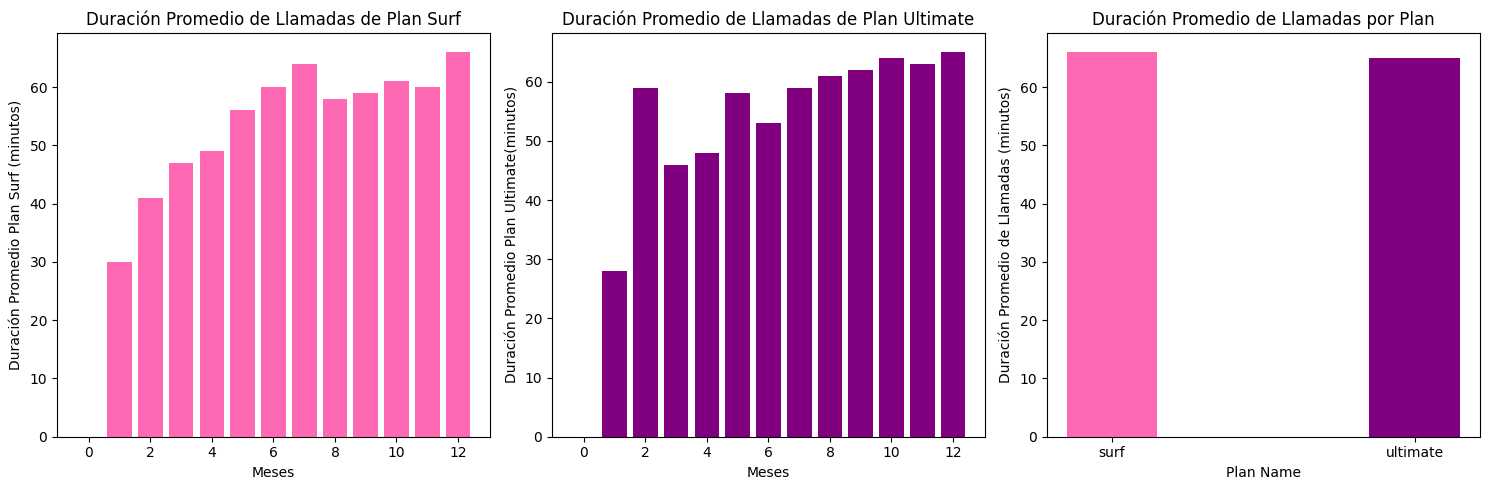

In [51]:
# Crear la figura y los ejes

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors_plan = ['hotpink','purple']

# Gráfico de duración promedio por mes de Plan Surf

axs[0].bar(mean_calls_surf ['month'], mean_calls_surf['mean_calls'], color='hotpink')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Duración Promedio Plan Surf (minutos)')
axs[0].set_title('Duración Promedio de Llamadas de Plan Surf')
axs[0].tick_params(axis='x')


# Gráfico de duración promedio por mes de Plan Ultimate

axs[1].bar(mean_calls_ultimate['month'], mean_calls_ultimate['mean_calls'], color='purple')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Duración Promedio Plan Ultimate(minutos)')
axs[1].set_title('Duración Promedio de Llamadas de Plan Ultimate')
axs[1].tick_params(axis='x')

# Gráfico de duración promedio por Plan

axs[2].bar(mean_calls['plan_name'], mean_calls['mean_calls'], color=colors_plan, width=0.3)
axs[2].set_xlabel('Plan Name')
axs[2].set_ylabel('Duración Promedio de Llamadas (minutos)')
axs[2].set_title('Duración Promedio de Llamadas por Plan')
axs[2].tick_params(axis='x')

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Comentario:**  En el gráfico (Plan Surf) muestra que la duración promedio de las llamadas  aumenta con el paso de los meses. Al inicio del año (mes 1), la duración promedio es baja, alrededor de 30 minutos, pero va creciendo hasta alcanzar un máximo de 65 minutos en el mes 12. Esto podría indicar un aumento en el uso del plan a lo largo del año.

En el gráfico (Plan Ultimate) podemos observar un patrón similar al de surf, comienza a principio de año con un consumo bajo menor a 30 minutos, sin embargo apartir del segundo mes comienza un caida, pero luego se estabiliza entre 50 a 65 minutos, hasta finales del año.

Esto nos indica que los usuarios de ambos planes tienden a realizar llamadas de duraciones similares. De hecho sin comparamos el ultimo gráfico barras de ambos planes, las barras se encuentra practicamente a la misma altura, se observa un promedio de  65 minutos para ambos.

In [52]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

calls_users_filtro =  users_datos.loc[:, ['user_id','month','plan_name','extra_calls']]

# Filtramos solo a los clientes que se excedieron en minutos 

calls_filtro = calls_users_filtro.loc[calls_users_filtro['extra_calls'] != 0]

# Agrupamos y Calculamos la suma de los minutos extras en llamadas consumido por el usuario

sum_minutes_extra_calls = calls_filtro.groupby(['user_id','plan_name'])['extra_calls'].sum().reset_index(name='sum_minutes_extra_calls')

display(sum_minutes_extra_calls)


,user_id,plan_name,sum_minutes_extra_calls
0,1003,surf,541
1,1007,surf,191
2,1009,surf,1594
3,1010,surf,640
4,1014,surf,551
...,...,...,...
156,1483,surf,139
157,1488,surf,1135
158,1491,surf,52
159,1494,surf,86


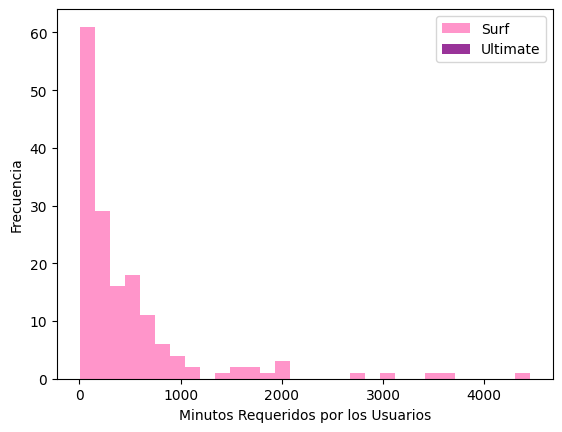

In [53]:
# Realizamos Grafico de Histogramas para Llamadas

sum_minutes_extra_calls[sum_minutes_extra_calls['plan_name'] == 'surf']['sum_minutes_extra_calls'].plot(kind='hist', color='hotpink', bins=30, alpha=0.7)

sum_minutes_extra_calls[sum_minutes_extra_calls['plan_name'] == 'ultimate']['sum_minutes_extra_calls'].plot(kind='hist', color='purple', bins=30, alpha=0.8)

plt.ylabel('Frecuencia')
plt.legend(['Surf', 'Ultimate']) 
plt.xlabel('Minutos Requeridos por los Usuarios')
plt.show()


**Comentario:** Podemos observar que los usuarios del plan surf son los unicos que exceden la cantidad de minutos de llamdas.Observamos un sesgo positivo, donde la mayoría de los usuarios consumen pocos minutos. Podemos ver que menos de 20 usuarios requieren 500 minutos. Un grupo muchisimo menor a 10 son los unicos que consumen más de 1000 minutos.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [54]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan surf

filtro_surf = users_datos.query('plan_name == "surf"')

# Obtener solo la columna y restablecer el índice
duration_filtro_surf = filtro_surf[['duration']].reset_index(drop=True)

# Ordenar de menor a mayor
duration_filtro_surf.sort_values(by='duration', inplace=True)

# Restablecer el índice después de ordenar
duration_filtro_surf = duration_filtro_surf.reset_index(drop=True)

# Calculamos la media de duracion mensual de llamadas

duration_mean_surf = duration_filtro_surf.mean()

# Calculamos la varianza de duracion mensual de llamadas

duration_var_surf = duration_filtro_surf.var()

print('La media en el Plan Surf en Minutos es:',duration_mean_surf['duration'])
print('La varianza en el Plan Surf en Minutos es:',duration_var_surf['duration'])


La media en el Plan Surf en Minutos es: 403.7086763774541
La varianza en el Plan Surf en Minutos es: 49577.53358120002


In [55]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan surf

filtro_ultimate = users_datos.query('plan_name == "ultimate"')

# Obtener solo la columna y restablecer el índice
duration_filtro_ultimate = filtro_surf[['duration']].reset_index(drop=True)

# Ordenar de menor a mayor
duration_filtro_ultimate.sort_values(by='duration', inplace=True)

# Restablecer el índice después de ordenar
duration_filtro_ultimate = duration_filtro_ultimate.reset_index(drop=True)

# Calculamos la media de duracion mensual de llamadas

duration_mean_ultimate = duration_filtro_ultimate.mean()

# Calculamos la varianza de duracion mensual de llamadas

duration_var_ultimate = duration_filtro_ultimate.var()

print('La media en el Plan Ultimate en Minutos es:',duration_mean_ultimate['duration'])
print('La varianza en el Plan Ultimate en Minutos es:',duration_var_ultimate['duration'])

La media en el Plan Ultimate en Minutos es: 403.7086763774541
La varianza en el Plan Ultimate en Minutos es: 49577.53358120002


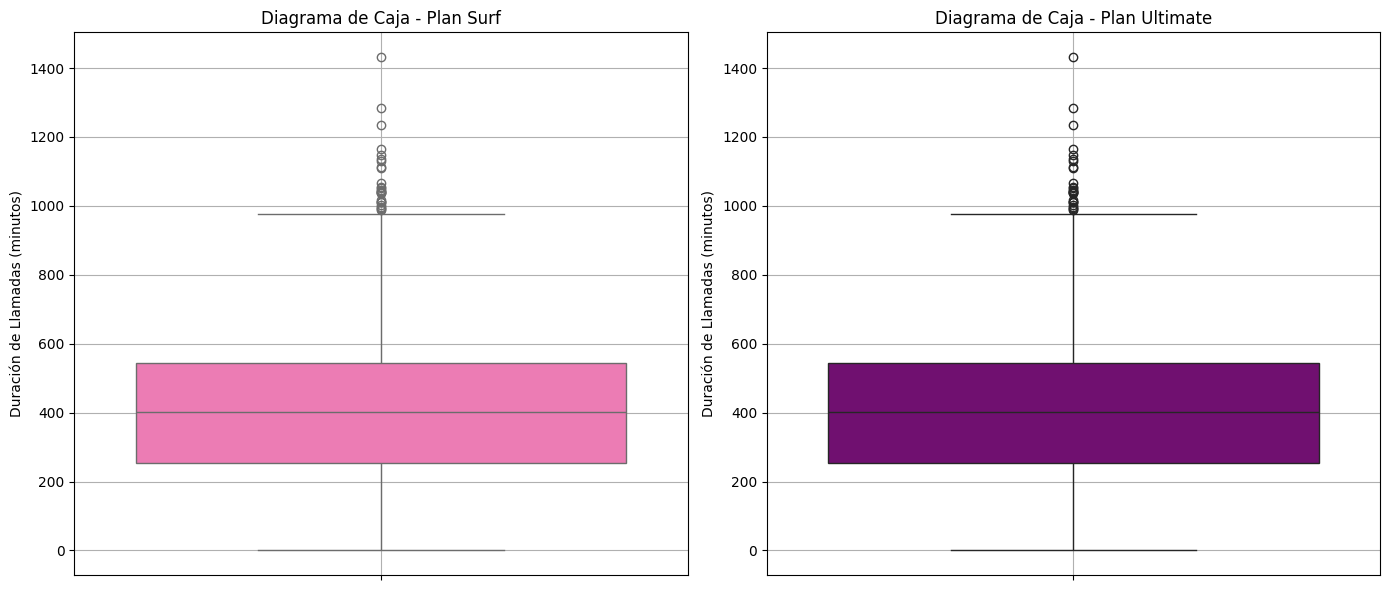

In [56]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Crear un diagrama de caja plan surf

fig, axs = plt.subplots(1, 2, figsize=(14, 6)) 

sns.boxplot(y='duration', data=duration_filtro_surf, color='hotpink',ax=axs[0])
axs[0].set_title('Diagrama de Caja - Plan Surf')
axs[0].set_ylabel('Duración de Llamadas (minutos)')
axs[0].grid()

# Crear un diagrama de caja plan ultimate

sns.boxplot(y='duration', data=duration_filtro_ultimate, color='purple',ax=axs[1])
axs[1].set_title('Diagrama de Caja - Plan Ultimate')
axs[1].set_ylabel('Duración de Llamadas (minutos)')
axs[1].grid()

plt.tight_layout()
plt.show()


**Comentario:** Para el siguiente diagrama, encontramos valores atipicos para ambos casos, tanto para plan surf como ultimate. Los valores atípicos, indican llamadas que duraron significativamente más tiempo, algunas incluso más de 1400 minutos, para el caso del plan surf, y para el plan ultimate 1200 minutos. El rango total de minutos para plan surf va de 0 1000 minutos y en plan ultimate de 0 a 1000 minutos tambien aproximadamente, nuestros valores atipicos exceden ese rango. La linea del medio de la caja nos indica la mediana, y esta se encuentra para ambos casos aproximadamente en 400 minutos lo que nos indica que el valor medio para ambos planes, es decir el 50% de nuestros usuarios mensualmente gastan esta cantidad de minutos. En definitiva nuestros planes tienen una distribución similar. Es interesante conocer esta distribución, ya que nos permite tener en cuenta la cantidad de minutos en la que exceden nuestros usuarios, al menos para el plan surf, ya que los minutos incluidos para este plan es de 500 al mes, y hay usuarios con consumo muchisimo mayor.

### Mensajes

In [57]:
# Comprara el promedio de número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Filtramos de nuestro dataframe los campos que nos interesa

messages_filtro_mean = users_datos.loc[:, ['month','cant_messages','plan_name']]

# Ordenar de menor a mayor
messages_filtro_mean.sort_values(by='cant_messages', inplace=True)

# Restablecer el índice después de ordenar
messages_filtro_mean = messages_filtro_mean.reset_index(drop=True)

# Agrupamos y Calculamos el promedio de la cantidad de mensajes

mean_messages = messages_filtro_mean.groupby(['plan_name','month'])['cant_messages'].mean().reset_index(name='mean_messages')

# Redondear promedio mensajes

mean_messages['mean_messages'] = mean_messages['mean_messages'].apply(math.ceil) 

display(mean_messages)

,plan_name,month,mean_messages
0,surf,0,0
1,surf,1,11
2,surf,2,12
3,surf,3,16
4,surf,4,18
5,surf,5,25
6,surf,6,26
7,surf,7,28
8,surf,8,29
9,surf,9,31


In [58]:
# Filtrando plan surf

mean_messages_surf = mean_messages[mean_messages['plan_name']=='surf']

# Filtrando plan ultimate

mean_messages_ultimate = mean_messages[mean_messages['plan_name']=='ultimate']

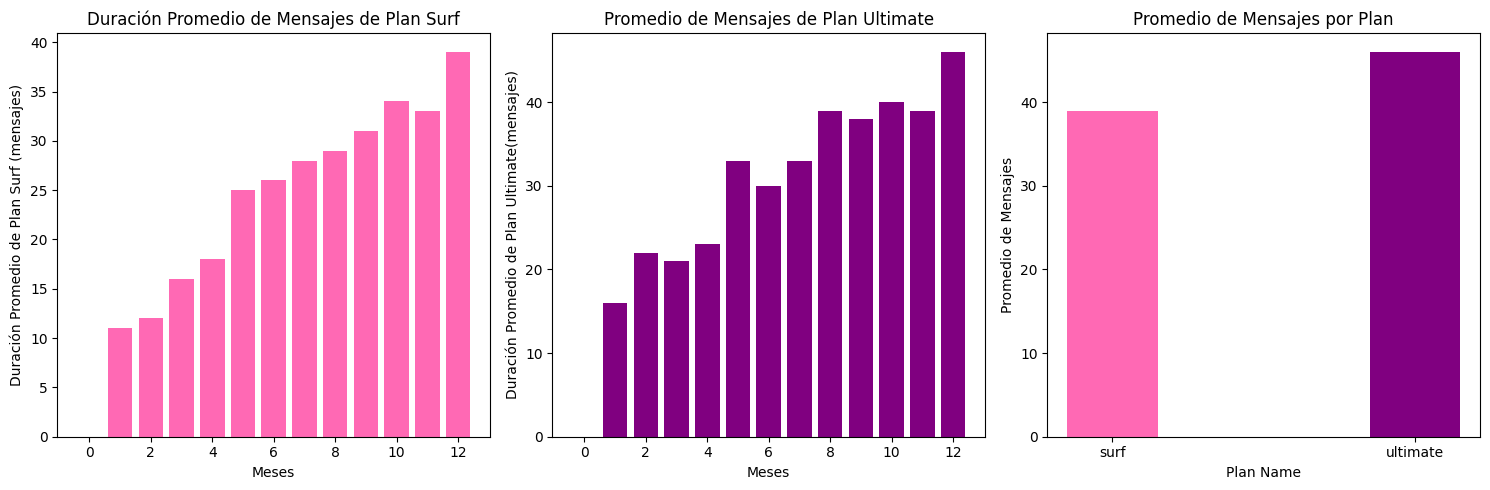

In [59]:
# Crear la figura y los ejes

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors_plan = ['hotpink','purple']

# Gráfico de duración promedio por mes de Plan Surf

axs[0].bar(mean_messages_surf['month'], mean_messages_surf['mean_messages'], color='hotpink')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Duración Promedio de Plan Surf (mensajes)')
axs[0].set_title('Duración Promedio de Mensajes de Plan Surf')
axs[0].tick_params(axis='x')


# Gráfico de duración promedio por mes de Plan Ultimate

axs[1].bar(mean_messages_ultimate['month'], mean_messages_ultimate['mean_messages'], color='purple')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Duración Promedio de Plan Ultimate(mensajes)')
axs[1].set_title('Promedio de Mensajes de Plan Ultimate')
axs[1].tick_params(axis='x')

# Gráfico de duración promedio por Plan

axs[2].bar(mean_calls['plan_name'], mean_messages['mean_messages'], color=colors_plan, width=0.3)
axs[2].set_xlabel('Plan Name')
axs[2].set_ylabel('Promedio de Mensajes')
axs[2].set_title('Promedio de Mensajes por Plan')
axs[2].tick_params(axis='x')

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Comentario:**  En el gráfico (Plan Surf) muestra un promedio de mensajes que aumenta con el paso de los meses. Va creciendo hasta alcanzar un máximo de 40 mensajes al mes. Esto podría indicar un aumento en el uso del plan a lo largo del año.

En el gráfico (Plan Ultimate) podemos observar un patrón similar al de surf, comienza a principio de año con un consumo menor de mensajes (10 mensajes en promedio), sin embargo apartir del segundo mes comienza un caida, pero luego se estabiliza, y supera los 40 mensajes para el ultimo mes.

Para nuestro ultimo gráfico, podemos  observar que el promedio de mensajes enviados por los clientes del plan ultimate, supera a los del plan surf. El plan surf casi cerca de los 40 y el plan ultimate con 45.

In [60]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.

menssages_users_filtro =  users_datos.loc[:, ['user_id','month','plan_name','extra_messages']]

# Filtramos solo a los clientes que se excedieron en mensajes

messages_filtro = menssages_users_filtro.loc[menssages_users_filtro['extra_messages'] != 0]

# Agrupamos y Calculamos la suma de los mensajes extras enviados por usuarios

sum_messages_extras = messages_filtro.groupby(['user_id','plan_name'])['extra_messages'].sum().reset_index(name='sum_messages_extras')

display(sum_messages_extras)

,user_id,plan_name,sum_messages_extras
0,1001,surf,3
1,1007,surf,10
2,1014,surf,14
3,1015,surf,18
4,1019,surf,78
...,...,...,...
108,1470,surf,656
109,1480,surf,1
110,1484,surf,33
111,1489,surf,120


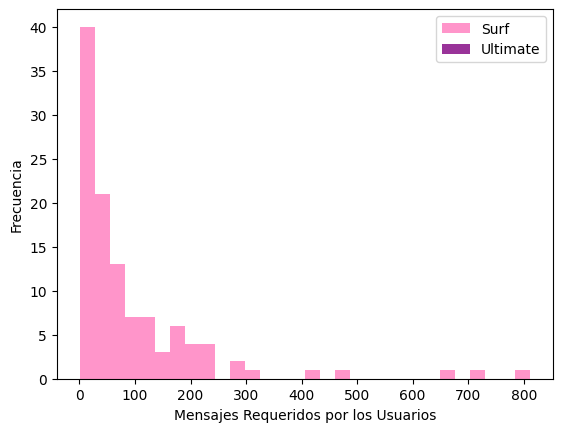

In [61]:
# Realizamos Grafico de Histogramas para Mensajes

sum_messages_extras[sum_messages_extras['plan_name'] == 'surf']['sum_messages_extras'].plot(kind='hist', color='hotpink', bins=30, alpha=0.7)

sum_messages_extras[sum_messages_extras['plan_name'] == 'ultimate']['sum_messages_extras'].plot(kind='hist', color='purple', bins=30, alpha=0.8)

plt.ylabel('Frecuencia')
plt.legend(['Surf', 'Ultimate']) 
plt.xlabel('Mensajes Requeridos por los Usuarios')
plt.show()


**Comentario:** Podemos observar que parecido al patrón en la duración de llamadas, los usuarios del plan surf son los unicos que exceden en la cantidad de mensajes que incluye su plan, aunque esta cantidad de usuarios es pequeña ya que solo 6 usuarios apróximadamente envian 100 mensajes adicionales.

In [62]:
# Calcula la media y la varianza de los mensajes mensual

# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan surf

filtro_surf = users_datos.query('plan_name == "surf"')

# Obtener solo la columna y restablecer el índice
messages_filtro_surf = filtro_surf[['cant_messages']].reset_index(drop=True)

# Ordenar de menor a mayor
messages_filtro_surf.sort_values(by='cant_messages', inplace=True)

# Restablecer el índice después de ordenar
messages_filtro_surf = messages_filtro_surf.reset_index(drop=True)

# Calcular la media de mensajes enviados en plan Surf
messages_mean_surf = messages_filtro_surf['cant_messages'].mean()

# Calcular la varianza de mensajes enviados en Plan Surf
messages_var_surf = messages_filtro_surf['cant_messages'].var()

print('La media en el Plan Surf en Mensajes es:', messages_mean_surf)
print('La varianza en el Plan Surf en Mensajes es:', messages_var_surf)

La media en el Plan Surf en Mensajes es: 31.041165294490185
La varianza en el Plan Surf en Mensajes es: 1126.1180762077684


In [63]:
# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan surf

filtro_ultimate = users_datos.query('plan_name == "ultimate"')

# Obtener solo la columna y restablecer el índice
messages_filtro_ultimate = filtro_ultimate[['cant_messages']].reset_index(drop=True)

# Ordenar de menor a mayor
messages_filtro_ultimate.sort_values(by='cant_messages', inplace=True)

# Restablecer el índice después de ordenar
messages_filtro_ultimate = messages_filtro_ultimate.reset_index(drop=True)

# Calcular la media de mensajes enviados en plan ultimate
messages_mean_ultimate = messages_filtro_ultimate['cant_messages'].mean()

# Calcular la varianza de mensajes enviados en plan ultimate
messages_var_surf = messages_filtro_ultimate['cant_messages'].var()

print('La media en el Plan Surf en Mensajes es:', messages_mean_surf)
print('La varianza en el Plan Surf en Mensajes es:', messages_var_surf)

La media en el Plan Surf en Mensajes es: 31.041165294490185
La varianza en el Plan Surf en Mensajes es: 1209.8276117007863


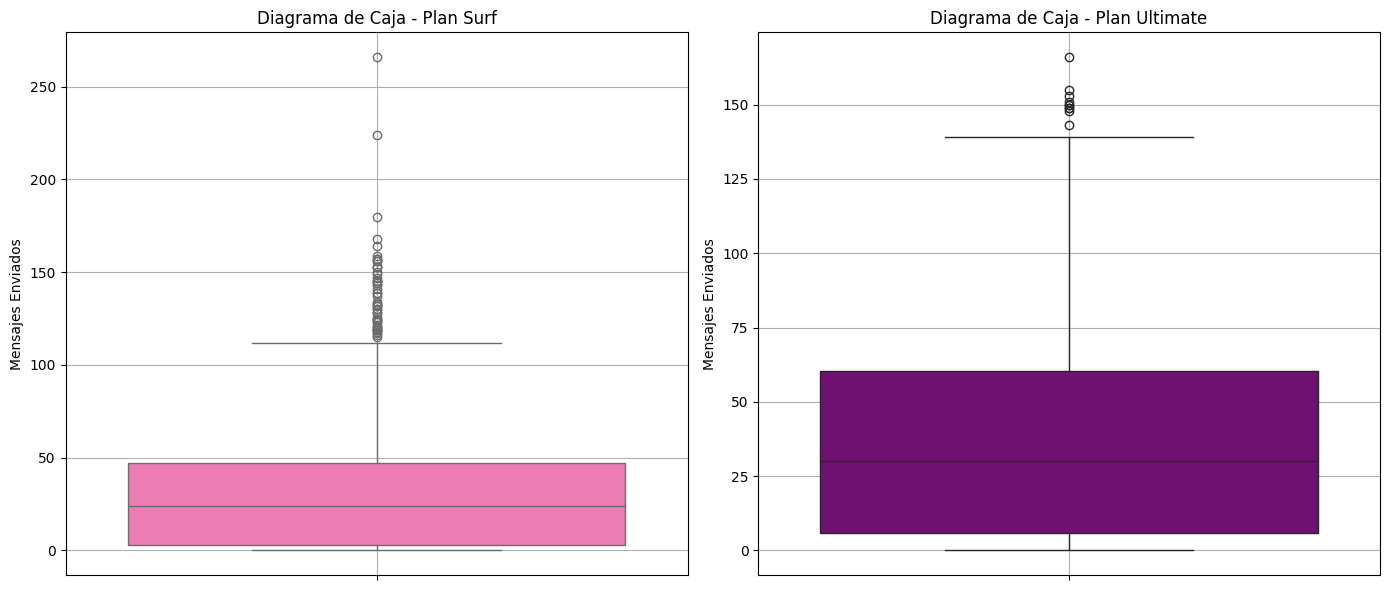

In [64]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensualmente

# Crear un diagrama de caja plan surf

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y='cant_messages', data=messages_filtro_surf, color='hotpink',ax=axs[0])
axs[0].set_title('Diagrama de Caja - Plan Surf')
axs[0].set_ylabel('Mensajes Enviados')
axs[0].grid()

# Crear un diagrama de caja plan ultimate

sns.boxplot(y='cant_messages', data=messages_filtro_ultimate, color='purple',ax=axs[1])
axs[1].set_title('Diagrama de Caja - Plan Ultimate')
axs[1].set_ylabel('Mensajes Enviados')
axs[1].grid()
plt.tight_layout()
plt.show()

**Comentario:** Para el siguiente diagrama, encontramos valores atipicos para ambos casos, tanto para plan surf como ultimate. Estos valores atípicos, nos indican la cantidad de mensajes enviados mensualmente por un grupo de usuarios. En el plan surf podemos observar una cantidad de valores atípicos que se situan entre 110 mensajes aproximadamente a 250 mensajes, superando en más del triple la cantidad de mensajes que se incluyen en su plan. Para el plan ultimate los valores atípicos se ubican por arriba de 140 hasta 160 mensajes. El valor medio para el plan surf se ubica en 25 mensajes y el valor medio del plan ultimate esta un poco por arriba de 25 mensajes, lo cual nos indica que el 50% de nuestros usuarios envian 25 mensajes o menos mensualmente, mienstras que el otro grupo restante envian más de 25 mensajes.

### Internet

In [65]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Filtramos de nuestro dataframe los campos que nos interesa

gb_filtro_mean = users_datos.loc[:, ['month','consum_gb','plan_name']]

# Ordenar de menor a mayor

gb_filtro_mean.sort_values(by='consum_gb', inplace=True)

# Restablecer el índice después de ordenar

gb_filtro_mean = gb_filtro_mean.reset_index(drop=True)

# Agrupamos y Calculamos el promedio de la cantidad de GB

mean_gb = gb_filtro_mean.groupby(['plan_name','month'])['consum_gb'].mean().reset_index(name='mean_consum_gb')

# Redondear promedio GB

mean_gb['mean_consum_gb'] = mean_gb['mean_consum_gb'].apply(math.ceil)

display(mean_gb)


,plan_name,month,mean_consum_gb
0,surf,0,0
1,surf,1,5
2,surf,2,13
3,surf,3,14
4,surf,4,13
5,surf,5,15
6,surf,6,16
7,surf,7,17
8,surf,8,17
9,surf,9,17


In [66]:
# Filtrando plan surf

mean_gb_surf = mean_gb[mean_gb['plan_name']=='surf']

# Filtrando plan ultimate

mean_gb_ultimate = mean_gb[mean_gb['plan_name']=='ultimate']


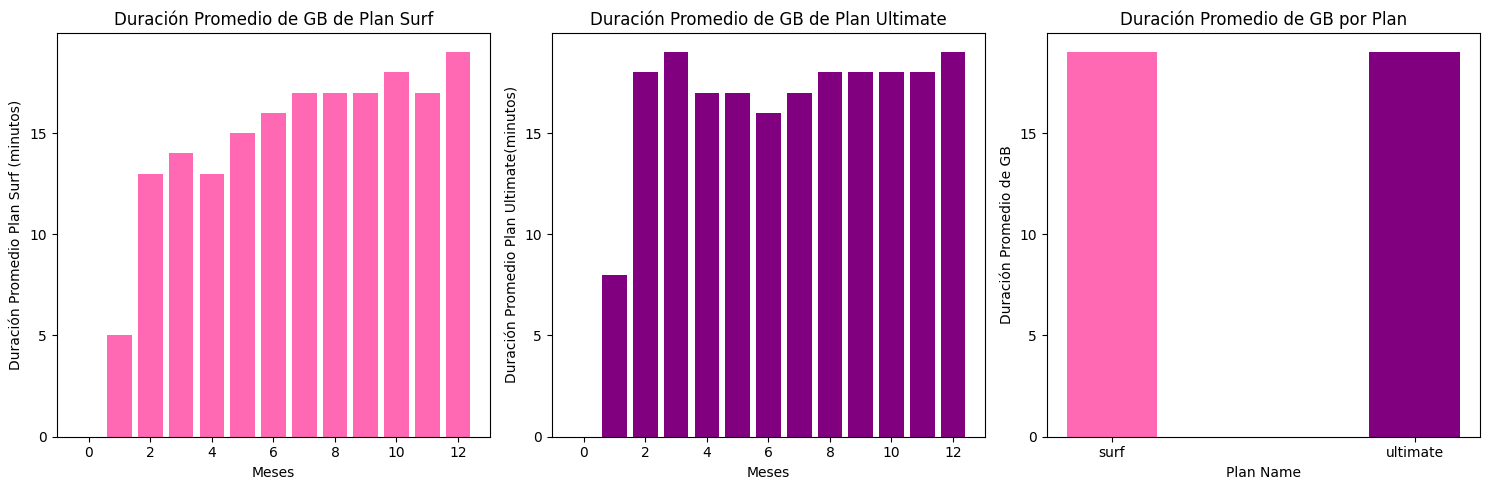

In [67]:
# Crear la figura y los ejes

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors_plan = ['hotpink','purple']

# Gráfico de duración promedio por mes de Plan Surf

axs[0].bar(mean_gb_surf['month'], mean_gb_surf['mean_consum_gb'], color='hotpink')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Duración Promedio Plan Surf (minutos)')
axs[0].set_title('Duración Promedio de GB de Plan Surf')
axs[0].tick_params(axis='x')

# Para que los ticks del eje y sean múltiplos de 5

axs[0].yaxis.set_major_locator(MultipleLocator(5))


# Gráfico de duración promedio por mes de Plan Ultimate

axs[1].bar(mean_gb_ultimate['month'], mean_gb_ultimate['mean_consum_gb'], color='purple')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Duración Promedio Plan Ultimate(minutos)')
axs[1].set_title('Duración Promedio de GB de Plan Ultimate')
axs[1].tick_params(axis='x')

# Para que los ticks del eje y sean múltiplos de 5

axs[1].yaxis.set_major_locator(MultipleLocator(5))

# Gráfico de duración promedio por Plan

axs[2].bar(mean_calls['plan_name'], mean_gb['mean_consum_gb'], color=colors_plan, width=0.3)
axs[2].set_xlabel('Plan Name')
axs[2].set_ylabel('Duración Promedio de GB')
axs[2].set_title('Duración Promedio de GB por Plan')
axs[2].tick_params(axis='x')

# Para que los ticks del eje y sean múltiplos de 5

axs[2].yaxis.set_major_locator(MultipleLocator(5))

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Comentario:** En el Gráfico de barras del plan surf, podemos observar un crecimiento ascendente donde el consumo para el mes 1 es de 5GB, culminando en a los 12 meses con 18 GB, solo en los meses 2 y 4 hubo un pequeño descenso, que despues se estabilizó y siguió en aumento.

En el Gráfico de barras del plan ultimate, de igual forma incia el consumo para el mes 1 en 8 GB, y para el mes 2 el consumo aumenta en más del doble, manteniendose un poco el consumo con leves variaciones hasta el ultimo mes del año.

Para el gráfico final promedio en consumo de GB (para ambos planes) es practicamente el mismo, es decir mensualmente consumen ambos planes 18 GB.

In [68]:
# Compara el número de GB mensuales que necesitan los usuarios de cada plan. Traza un histograma.

gb_users_filtro =  users_datos.loc[:, ['user_id','month','plan_name','extra_gb']]

# Filtramos solo a los clientes que se excedieron en mensajes

gb_filtro_extras = gb_users_filtro.loc[gb_users_filtro['extra_gb'] != 0]

# Agrupamos y Calculamos la suma de GB extras consumidos por el usuario

sum_gb_extras = gb_filtro_extras.groupby(['user_id','plan_name'])['extra_gb'].sum().reset_index(name='sum_gb_extras')

display(sum_gb_extras)

,user_id,plan_name,sum_gb_extras
0,1001,surf,13.792939
1,1002,surf,3.891680
2,1003,surf,11.410293
3,1004,surf,42.093721
4,1005,surf,1.738447
...,...,...,...
274,1494,surf,4.881836
275,1495,surf,36.573203
276,1496,surf,2.058848
277,1498,surf,57.732373


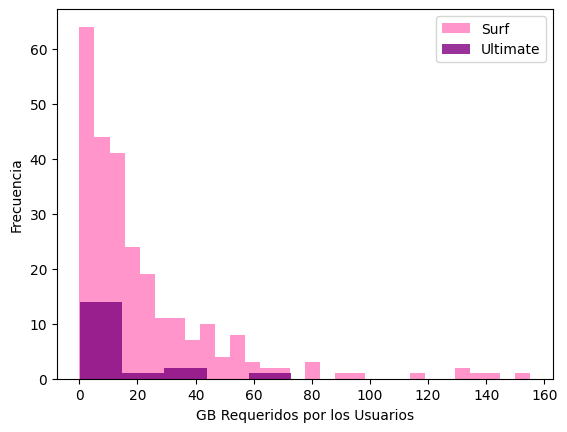

In [69]:
# Realizamos Grafico de Histogramas para GB

sum_gb_extras[sum_gb_extras['plan_name'] == 'surf']['sum_gb_extras'].plot(kind='hist', color='hotpink', bins=30, alpha=0.7)

sum_gb_extras[sum_gb_extras['plan_name'] == 'ultimate']['sum_gb_extras'].plot(kind='hist', color='purple', bins=5, alpha=0.8)

plt.ylabel('Frecuencia')
plt.legend(['Surf', 'Ultimate']) 
plt.xlabel('GB Requeridos por los Usuarios')
plt.show()

**Comentario:** Para siguiente gráfico podemos observar que existen usuarios de ambos planes que consumen GB extras, 
para el plan surf, podemos observar que para la primera barra un total de 80 usuarios requieren menos de 10 GB, 
un poco menos de 15 usuarios son los que consumen 20 GB extras al mes. Aunque tambien observamos en distintos intervalos, (hay usuarios hasta en los rangos más altos de 40 a 60 GB, y algunos hasta los 140 GB) pero es una cantidad mucho menor de 5 usuarios con este consumo.

Para el caso del plan ultimate, observamos que un total de un poco más de 10 usuarios aproximadamente son los que consumen 10 GB extras mensualmente, y solo hay par de usuarios situados en consumo de 40 y 60 GB extras.

In [70]:
# Calcula la media y la varianza de los GB mensual

# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan surf

filtro_surf_gb = users_datos.query('plan_name == "surf"')

# Obtener solo la columna y restablecer el índice
filtro_surf_gb = filtro_surf_gb[['consum_gb']].reset_index(drop=True)

# Ordenar de menor a mayor
filtro_surf_gb.sort_values(by='consum_gb', inplace=True)

# Restablecer el índice después de ordenar
filtro_surf_gb = filtro_surf_gb.reset_index(drop=True)


# Calculamos la media de GB usados en plan Surf
gb_mean_surf = filtro_surf_gb.mean()

# Calculamos la varianza de GB usados en plan Surf
gb_var_surf = filtro_surf_gb.var()

print('La media en el Plan Surf en GB es:',gb_mean_surf ['consum_gb'])
print('La varianza en el Plan Surf en GB es:',gb_var_surf ['consum_gb'])

La media en el Plan Surf en GB es: 16.60734642178594
La varianza en el Plan Surf en GB es: 62.40212597053693


In [71]:
# Calcula la media y la varianza de los GB mensual

# Filtramos de nuestro dataframe el campo que nos interesa en este caso para el plan ultimate

filtro_ultimate_gb = users_datos.query('plan_name == "ultimate"')

# Obtener solo la columna y restablecer el índice
gb_filtro_ultimate = filtro_surf[['consum_gb']].reset_index(drop=True)

# Ordenar de menor a mayor
gb_filtro_ultimate.sort_values(by='consum_gb', inplace=True)

# Restablecer el índice después de ordenar
gb_filtro_ultimate = gb_filtro_ultimate.reset_index(drop=True)

# Calculamos la media de GB usados en plan ultimate

gb_mean_ultimate = gb_filtro_ultimate.mean()

# Calculamos la varianza de GB usados en plan ultimate

gb_var_ultimate = gb_filtro_ultimate.var()

print('La media en el Plan Ultimate en GB es:',gb_mean_ultimate ['consum_gb'])
print('La varianza en el Plan Ultimate en GB es:',gb_var_ultimate ['consum_gb'])

La media en el Plan Ultimate en GB es: 16.60734642178594
La varianza en el Plan Ultimate en GB es: 62.40212597053693


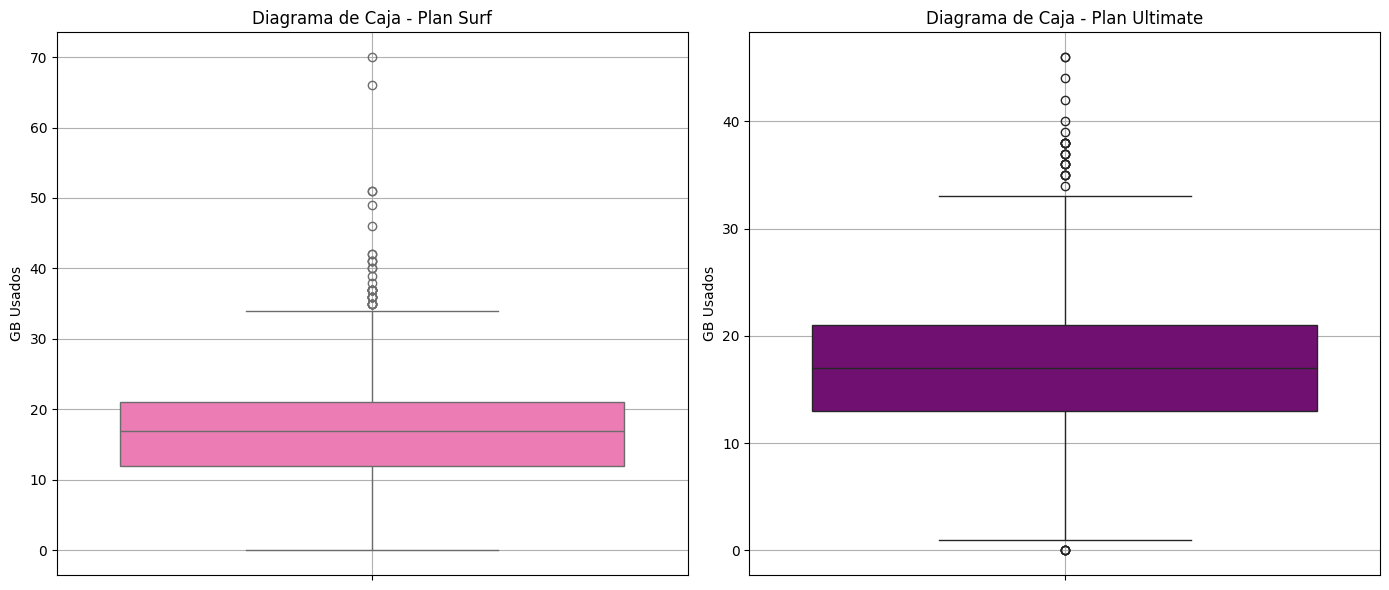

In [72]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes mensualmente

# Crear un diagrama de caja plan surf

fig, axs = plt.subplots(1, 2, figsize=(14, 6)) 

sns.boxplot(y='consum_gb', data=filtro_surf_gb, color='hotpink',ax=axs[0])
axs[0].set_title('Diagrama de Caja - Plan Surf')
axs[0].set_ylabel('GB Usados')
axs[0].grid()

# Crear un diagrama de caja plan ultimate

sns.boxplot(y='consum_gb', data=filtro_ultimate_gb, color='purple',ax=axs[1])
axs[1].set_title('Diagrama de Caja - Plan Ultimate')
axs[1].set_ylabel('GB Usados')
axs[1].grid()

plt.tight_layout()
plt.show()


**Comentario:** Para el siguiente diagrama, tambien observamos valores atípicos, para el plan surf entre 35 GB hasta 70 GB, es mucho más de la cantidad incluida en su paquete, solo 50% consume los 15 GB que incluye el plan.

Para el plan ultimate tambien se observan valores atípicos, por arriba de 31 GB hasta casi 50 GB, el valor medio es de 25 GB, es decir el 50% de los usuarios consumen estan cantidad.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [73]:
filtro_mensual_surf = users_datos[users_datos['plan_name']=='surf']

filtro_mensual_surf_users = filtro_mensual_surf.loc[:,['user_id','plan_name','costo_mensual']]

# Ordenar de menor a mayor
filtro_mensual_surf_users.sort_values(by='costo_mensual', inplace=True)

# Restablecer el índice después de ordenar
filtro_mensual_surf_users = filtro_mensual_surf_users.reset_index(drop=True)

g_mensual_surf_users = filtro_mensual_surf_users.groupby('plan_name')['costo_mensual'].mean().reset_index(name='ingreso_mensual_surf')

display(g_mensual_surf_users)

,plan_name,ingreso_mensual_surf
0,surf,57.156584


In [74]:
filtro_mensual_ultimate = users_datos[users_datos['plan_name']=='ultimate']

filtro_mensual_ultimate_users = filtro_mensual_ultimate.loc[:,['user_id','plan_name','costo_mensual']]

# Ordenar de menor a mayor
filtro_mensual_ultimate_users.sort_values(by='costo_mensual', inplace=True)

# Restablecer el índice después de ordenar
filtro_mensual_ultimate_users = filtro_mensual_ultimate_users.reset_index(drop=True)

g_mensual_ultimate_users = filtro_mensual_ultimate_users.groupby('plan_name')['costo_mensual'].mean().reset_index(name='ingreso_mensual_ultimate')

display(g_mensual_ultimate_users)

,plan_name,ingreso_mensual_ultimate
0,ultimate,72.104389


**Comentario:** Podemos observar a simple vista que aunque el plan ultimate es mayor, el ingreso percibido por ultimate es casi 3 veces mayor a lo que se cobra por ese plan mensualmente, mienstras que para el plan ultimate la ganancia es poca en comparación a lo que se cobra. Sin embargo debemos realicemos la prueba de hipótesis para evaluar que resultatado nos arroja, antes de tomar una decisión sobre a que plan invertirle más publicidad.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

<div class="alert alert-block alert-info">
<b>Hipótesis</b>
<b>Nula (H₀): El ingreso promedio de los planes Ultimate y Surf es igual.
Alternativa (H₁): El ingreso promedio de los planes Ultimate y Surf es diferente.
Nivel de significancia: α = 0.05</b> <a class="tocSkip"></a>
</div>


In [81]:
# Prueba las hipótesis

# Filtramos los ingresos del plan surf
ingresos_surf = users_datos.query('plan_name == "surf"')['costo_mensual'].copy()

# Ordenar de menor a mayor
ingresos_surf.sort_values(inplace=True)

# Restablecer el índice después de ordenar
ingresos_surf = ingresos_surf.reset_index(drop=True)


# Filtramos por plan ultimate
ingresos_ultimate = users_datos.query('plan_name == "ultimate"')['costo_mensual'].copy()

# Ordenar de menor a mayor
ingresos_ultimate.sort_values(inplace=True)

# Restablecer el índice después de ordenar
ingresos_ultimate = ingresos_ultimate.reset_index(drop=True)

# Realizar la prueba t de Student
resultado = stats.ttest_ind(ingresos_surf, ingresos_ultimate)


# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(ingresos_ultimate,ingresos_surf,equal_var=True)

# Resultados
print('Estadística t:', t_statistic)
print('Valor p:', p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula, el ingreso promedio de los planes Ultimate y Surf es diferente.")
else:
    print("No podemos rechazar la hipótesis nula, no hay evidencia suficiente para afirmar que los ingresos promedio de los planes Ultimate y Surf sean diferentes.")
    

Estadística t: 7.423433805047464
Valor p: 1.5977704958908065e-13
Rechazamos la hipótesis nula, el ingreso promedio de los planes Ultimate y Surf es diferente.


**Objetivo:**

Determinar si existe una diferencia estadísticamente significativa en el ingreso promedio mensual entre los suscriptores de los planes Ultimate y Surf.

**Hipótesis:**
                                                                                 
Alternativa (H₁): Existe una diferencia significativa en el ingreso promedio mensual entre los suscriptores de los planes Ultimate y Surf (μ₁ ≠ μ₂).

**Comentarios:**

- Ingreso promedio del plan Surf: 54.41
- Ingreso promedio del plan Ultimate: 71.90
- Prueba t: Indica que la diferencia entre los ingresos promedio es significativa (t_stat = 8.91, Valor p: 9.88e-19 (extremadamente pequeño, mucho menor que 0.05)

**Conclusión:**

- El plan Ultimate tiene ingresos promedio más altos (71.90) que el plan Surf (54.41), sin embargo podemos obsevar que el promedio el plan surf esta generando casi 3 veces más ganancias que el plan ultimate.
- La prueba t confirma que esta diferencia en los ingresos promedio no es producto del azar, sino que es estadísticamente significativa. Esto significa que los usuarios de los dos planes pertenecen a grupos con ingresos diferentes de manera clara.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

<div class="alert alert-block alert-info">
<b>Hipótesis</b>
<b>Nula (H₀): El ingreso promedio mensual de los suscriptores a los planes Ultimate y Surf en NY-NJ es estadísticamente igual.
Alternativa (H₁): El ingreso promedio mensual de los suscriptores a los planes Ultimate y Surf en NY-NJ es estadísticamente diferente.
Nivel de significancia: α = 0.05</b> <a class="tocSkip"></a>
</div>



In [80]:
# Filtrar dataframe users_datos con los campos que nos interesa 

filtro_regiones = users_datos.loc[:,['plan_name','city','costo_mensual']]

# Filtrar dataframe por plan surf y por la región ‘New York-Newark-Jersey City, NY-NJ-PA MSA’

filtro_surf_ny_nj = filtro_regiones[(filtro_regiones['plan_name'] == 'surf') & (filtro_regiones['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')]

# Realizar filtro de las columnas que nos interesan, ya que las tenemos filtrada por plan surf

filtro_surf_nynj = filtro_surf_ny_nj.loc[:, ['city', 'costo_mensual']]

# Renombrar columna de ingresos de plan surf

filtro_surf_nynj.rename(columns={'costo_mensual': 'ingresos_mensual_surf'}, inplace=True)

# Guardar valores de ingresos de plan surf

ingresos_surf = filtro_surf_nynj['ingresos_mensual_surf'].values

# Filtrar dataframe por plan ultimate y por la región ‘New York-Newark-Jersey City, NY-NJ-PA MSA’

filtro_ultimate_ny_nj = filtro_regiones[(filtro_regiones['plan_name'] == 'ultimate') & (filtro_regiones['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')]

# Realizar filtro de las columnas que nos interesan, ya que las tenemos filtrada por plan ultimate

filtro_ultimate_nynj = filtro_ultimate_ny_nj.loc[:, ['city', 'costo_mensual']]

# Renombrar columna de ingresos de plan ultimate

filtro_ultimate_nynj.rename(columns={'costo_mensual': 'ingresos_mensual_ultimate'}, inplace=True)

# Guardar valores de ingresos de plan ultimate

ingresos_ultimate = filtro_ultimate_nynj['ingresos_mensual_ultimate'].values

# Calcular varianzas para plan surf y ultimate

var_surf = ingresos_surf.var()
var_ultimate = ingresos_ultimate.var()

# Aplicar la prueba t de Student para muestras independientes solo si las varianzas son diferentes de cero

if var_ultimate > 0 and var_surf > 0:
    t_stat, p_value = ttest_ind(ingresos_ultimate,ingresos_surf)

    # Mostrar resultados de la prueba t
    print(f'Estadístico t: {t_stat}')
    print(f'Valor p: {p_value}')

    # Interpretar los resultados
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula, el ingreso promedio mensual de los suscriptores a los planes Ultimate y Surf en NY-NJ es estadísticamente diferente.")
    else:
        print("No podemos rechazar la hipótesis nula, no hay evidencia suficiente para afirmar que los ingresos promedio de los planes Ultimate y Surf en NY-NJ sean diferentes.")
else:
    print("No se puede realizar la prueba t porque la varianza es cero en una o ambas muestras.")

print()
print()

mean_nynj_surf = ingresos_surf.mean()
mean_nynj_ultimate = ingresos_ultimate.mean()

print('Ingreso Promedio del plan Surf en la Region NY-NJ:', mean_nynj_surf)
print('Ingreso Promedio del plan Ultimate en la Region NY-NJ:', mean_nynj_ultimate)

Estadístico t: 3.740384446733929
Valor p: 0.00021237786485301817
Rechazamos la hipótesis nula, el ingreso promedio mensual de los suscriptores a los planes Ultimate y Surf en NY-NJ es estadísticamente diferente.


Ingreso Promedio del plan Surf en la Region NY-NJ: 53.56430131961138
Ingreso Promedio del plan Ultimate en la Region NY-NJ: 74.54766956676136


**Objetivo:**

Determinar si existe una diferencia estadísticamente significativa en el ingreso promedio mensual entre los suscriptores de los planes Ultimate y Surf en NY-NJ.

**Hipótesis:**
                                                                                 
Alternativa (H₁): Existe una diferencia significativa en el ingreso promedio mensual entre los suscriptores de los planes Ultimate y Surf (μ₁ ≠ μ₂).

**Comentarios:**

- Ingreso promedio del plan Surf en NY-NJ: 50.64
- Ingreso promedio del plan Ultimate en NY-NJ: 73.92
- Prueba t: Indica que la diferencia entre los ingresos promedio es significativa (t_stat = 4.29, Valor p: 2.24e-05 (extremadamente pequeño, mucho menor que 0.05)

**Conclusión:**
 
- El plan Ultimate en NY-NJ tiene ingresos promedio más alto (73.92) que el plan Surf en NY-NJ (50.64),sin embargo podemos obsevar que el promedio del plan surf esta generando casi 3 veces más ganancias que el plan ultimate.
- La prueba t confirma que esta diferencia en los ingresos promedio no es producto del azar, sino que es estadísticamente significativa. Esto significa que los usuarios de los dos planes pertenecen a grupos con ingresos diferentes de manera clara.


## Conclusión general

- Se realizó primeramente limpieza de la data, evaluando duplicados y ausentes.
- Para realizar la union de los dataframes se realizó mediante how='outer', ya que nos interesaba conversar todos los registros de ambos dataframes, sin excluir ningún registro.
- Convertimos los campos fechas en tipo dataTime para poder trabajar y extraer campo necesarios para nuestras unión de tablas.
- Cambiamos el nombre en nuestro dataframe de la columna plan en nuestro dataframe users, ya que el el nombre de la columna en plans era plan_name, asi que la renombramos a "plan_name" de igual manera.
- Creamos una columna nueva llamada consumo en GB, ya que el precio en plans se encontraban en gb y no en megabytes.
- Con la unión de los dataframes que realizamos de tipo how= 'outer', realizamos cálculo de cantidad de duracion de llamdas en minutos, cantidad de mensajes enviados y el consumo de gigabytes que mensualmente gastaron. 
- Para realizar la el calculo de las llamdas, gb extras y mensajes enviados realizamos un ciclo for para iterar sobre cada una de las filas de nuestro dataframe, haciendo uso de los campos cantidad de mensajes, cantidad de minutos en llamadas gastados, cantidad de mensajes enviados, megabytes consumidos, gigabytes consumidos, para poder realizar la comparación de lo que incluia el plan contra lo que consumierón los usuarios.
- Realizamos el cálculo para cada usuario de todo lo consumido durante el mes, que incluia la sumatoria de lo que se cobraba en su plan, adicional a los cargos extras generados en mensajes, llamadas y gigabytes.
- Para nuestra tabla final, realizamos ciertas conversiones en tipo de datos que se encontraban, algunos de tipo object, y otros a entero, esto con el fin, de poder realizar los cálculos estadisticos correspondientes.
- Se realizó para cada grupo, duración de llamadas en minutos, mensajes enviados y gb consumidos, cálculo de la media, varianza junto con sus respectivos gráficos, lo que me permitio evaluar de forma un poco más visual el compartamiento de los usuarios. Se pudo observar patrones muy simliares en algunos gráficos asi como valores atipicos en cada uno (llamadas, mensajes enviados y gb consumidos), lo cual es positivo para nuestro estudio, porque nos indica un patrón en que el consumo de los usuarios excede a lo que tienen en su plan.
- Pudimos realizar el cálculo de los ingresos para cada plan, en el cual pudimos observar que pese a que el del plan ultimate era mayor, sin embargo el del plan surf esta generando casi 3 veces más ganancias, y la prueba de Hipótesis nos reafirma que los ingresos promedios son significativamente diferentes para ambos planes.
- Por lo que podemos concluir que el plan que esta generando más ingresos es el plan Surf.